# 전력발전유형별 전력생산량 전처리
---
- 시점: 1996 - 2020 (월별)
    - 연,월 컬럼 2개로 나눌 것
    - 전력 발전 유형 : LNG(기력), 수력, 원자력, 내연력, 화력, 신재에너지(집단+대체+신재생에너지) 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.rc('font',family='Malgun Gothic')

## [1] 데이터 파악




### 1-1. 컬럼구성
---
- 1-1-1. 대분류(한전, 타사, 사업자, 자가발전)   
    -> **사업자 = 한전+타사 발전** , 자가발전은 매우 작은 값이므로 사업자 데이터를 사용  

- 1-1-2. 중분류(수력, 화력, 원자력, 기력, 내연력, 대체에너지, 대체에너지, 신재생에너지)  
    -> 중분류 단위로 컬럼 구성 

- 1-1-3. 소분류(양수, 일반, LNG, 무연탄,유연탄, 중유 등...)  
    -> 기력의 경우만 소분류 단위로 구성, LNG가 가장 중요한 지표이기 때문

In [108]:
data1996_2014 = pd.read_csv('../data/발전전력량_추이_1996_2014.csv', encoding='euc-kr')
data2015_2020 = pd.read_csv('../data/발전전력량_추이_2015_2020.csv', encoding='euc-kr')

In [109]:
data1996_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시점         230 non-null    object
 1   한전 자회사     230 non-null    object
 2   한전 자회사.1   230 non-null    object
 3   한전 자회사.2   230 non-null    object
 4   한전 자회사.3   230 non-null    object
 5   한전 자회사.4   230 non-null    object
 6   한전 자회사.5   230 non-null    object
 7   한전 자회사.6   230 non-null    object
 8   한전 자회사.7   230 non-null    object
 9   한전 자회사.8   230 non-null    object
 10  한전 자회사.9   230 non-null    object
 11  한전 자회사.10  230 non-null    object
 12  한전 자회사.11  230 non-null    object
 13  한전 자회사.12  230 non-null    object
 14  한전 자회사.13  230 non-null    object
 15  한전 자회사.14  230 non-null    object
 16  한전 자회사.15  230 non-null    object
 17  타사         230 non-null    object
 18  타사.1       230 non-null    object
 19  타사.2       230 non-null    object
 20  타사.3       230 non-null    objec

In [110]:
# 1996~2014
data1996_2014 = data1996_2014.set_index('시점')
data1996_2014.columns = data1996_2014.columns + '-' + data1996_2014.iloc[0,:] + '-' + data1996_2014.iloc[1,:]
data1996_2014 = data1996_2014.drop('시점',axis=0)
data1996_2014

,한전 자회사-소계-소계,한전 자회사.1-수력-소계,한전 자회사.2-수력-일반,한전 자회사.3-수력-양수,한전 자회사.4-기력-소계,한전 자회사.5-기력-무연탄,한전 자회사.6-기력-유연탄,한전 자회사.7-기력-중유,한전 자회사.8-기력-LNG,한전 자회사.9-복합화력-소계,...,상용자가.1-한전구입-소계,상용자가.2-자가 소비-소계,총 발전량-소계-소계,총 발전량.1-수력-소계,총 발전량.2-기력-소계,총 발전량.3-내연력-소계,총 발전량.4-원자력-소계,총 발전량.5-복합화력-소계,총 발전량.6-사업자+한전구입-소계,총 발전량.7-사업자+상용자가-소계
시점,,,,,,,,,,,,,,,,,,,,,
1996.01,16379503,275441,-,-,8060220,-,-,-,-,2056170,...,-,-,16879415,363291,8408979,72696,5914976,2119473,-,-
1996.02,14946085,273885,-,-,7295448,-,-,-,-,1814917,...,-,-,15386890,356379,7593086,64679,5497157,1875589,-,-
1996.03,16361713,287330,-,-,7941015,-,-,-,-,1873066,...,-,-,16853951,362980,8306941,64834,6195468,1923728,-,-
1996.04,15612722,276682,-,-,7936402,-,-,-,-,1699358,...,-,-,16114221,367415,8299351,62517,5637764,1747174,-,-
1996.05,16057404,327237,-,-,7819184,-,-,-,-,2049991,...,-,-,16550637,440662,8156027,60807,5800186,2092955,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.08,37719216,660348,104875,555473,19126390,760461,18116361,249569,0,3707255,...,15314,...,-,-,-,-,-,-,43473903,...
2014.09,34309730,628959,94595,534364,16152217,617652,15140281,394284,0,4833392,...,18013,...,-,-,-,-,-,-,40604161,...
2014.10,35075130,529015,58136,470880,16440325,582605,15658190,199530,0,4800810,...,30457,...,-,-,-,-,-,-,42115332,...


In [111]:
# 2015~2020
# 연도 + 월 컬럼 -> 시점 컬럼 생성 
data2015_2020['시점'] = data2015_2020['시점'] +'.'+ data2015_2020.iloc[:,1]

# 대분류 + 중분류 + 소분류 행 -> 분류 하나 만들기 
data2015_2020 = data2015_2020.set_index('시점')
data2015_2020.columns = data2015_2020.columns + '-' + data2015_2020.iloc[0,:] + '-' + data2015_2020.iloc[1,:]
data2015_2020 = data2015_2020.drop('시점.월별(1)',axis=0)
data2015_2020 = data2015_2020.drop('월별(1)-월별(1)-월별(1)', axis=1)
data2015_2020

,한전 및 자회사-소계-소계,한전 및 자회사.1-수력-소계,한전 및 자회사.2-수력-일반,한전 및 자회사.3-수력-양수,한전 및 자회사.4-수력-소수력,한전 및 자회사.5-기력-소계,한전 및 자회사.6-기력-무연탄,한전 및 자회사.7-기력-유연탄,한전 및 자회사.8-기력-중유,한전 및 자회사.9-기력-LNG,...,사업자(종합).8-기력-중유,사업자(종합).9-기력-LNG,사업자(종합).10-복합화력-소계,사업자(종합).11-원자력-소계,사업자(종합).12-신재생-소계,사업자(종합).13-집단-소계,사업자(종합).14-내연력-소계,사업자(종합).15-기타-소계,상용자가-한전구입-소계,총발전량-사업자+한전구입-소계
시점,,,,,,,,,,,,,,,,,,,,,
2015.1월,40246639,391618,35028,343248,13341,19981160,747773,18595501,565283,72603,...,565283,72603,10157844,14219729,1389857,2492152,51511,-,102306,48941856
2015.2월,34831198,356839,39561,305124,12154,17655058,650190,16346181,611868,46819,...,611868,46819,8389732,12085324,1222329,2080104,47119,-,92741,42063459
2015.3월,36989660,381252,40644,327216,13393,19147935,703659,16953652,1490624,-,...,1490624,-,9495291,13053018,1462182,1911254,72461,-,74550,45741749
2015.4월,33667819,270808,60936,194723,15149,17006886,597629,15626311,782872,74,...,782872,74,8014525,13015704,1383634,1575627,56829,-,34204,41517058
2015.5월,33674327,268335,80413,173165,14757,17006381,644195,15950787,410329,1070,...,410329,1070,7696793,12591490,1470631,1467888,65980,-,31376,40788967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.8월,37028344,486106,196832,271733,17542,19152660,155300,18761178,121015,115167,...,121015,115167,10603489,12526259,2697249,3479530,39266,523212,147518,51050911
2020.9월,31732039,465670,199410,250835,15425,17490336,17746,16915898,515236,41455,...,515236,41455,9780155,9292564,2718018,3049505,40082,519733,90953,44599442
2020.10월,29877629,320248,64207,243082,12959,12902403,10420,12771246,109619,11118,...,109619,11118,9393692,13468311,2896983,3030188,36319,111973,127491,43164475


In [112]:
data1996_2014.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1996.01 to 2014.12
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   한전 자회사-소계-소계         228 non-null    object
 1   한전 자회사.1-수력-소계       228 non-null    object
 2   한전 자회사.2-수력-일반       228 non-null    object
 3   한전 자회사.3-수력-양수       228 non-null    object
 4   한전 자회사.4-기력-소계       228 non-null    object
 5   한전 자회사.5-기력-무연탄      228 non-null    object
 6   한전 자회사.6-기력-유연탄      228 non-null    object
 7   한전 자회사.7-기력-중유       228 non-null    object
 8   한전 자회사.8-기력-LNG      228 non-null    object
 9   한전 자회사.9-복합화력-소계     228 non-null    object
 10  한전 자회사.10-복합화력-일반    228 non-null    object
 11  한전 자회사.11-복합화력-열공급   228 non-null    object
 12  한전 자회사.12-집단-소계      228 non-null    object
 13  한전 자회사.13-내연력-소계     228 non-null    object
 14  한전 자회사.14-대체-소계      228 non-null    object
 15  한전 자회사.15-원자력-소계     228 non-null    object
 16  타사-

In [113]:
data2015_2020.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2015.1월 to 2020.12월
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   한전 및 자회사-소계-소계       72 non-null     object
 1   한전 및 자회사.1-수력-소계     72 non-null     object
 2   한전 및 자회사.2-수력-일반     72 non-null     object
 3   한전 및 자회사.3-수력-양수     72 non-null     object
 4   한전 및 자회사.4-수력-소수력    72 non-null     object
 5   한전 및 자회사.5-기력-소계     72 non-null     object
 6   한전 및 자회사.6-기력-무연탄    72 non-null     object
 7   한전 및 자회사.7-기력-유연탄    72 non-null     object
 8   한전 및 자회사.8-기력-중유     72 non-null     object
 9   한전 및 자회사.9-기력-LNG    72 non-null     object
 10  한전 및 자회사.10-복합화력-소계  72 non-null     object
 11  한전 및 자회사.11-원자력-소계   72 non-null     object
 12  한전 및 자회사.12-신재생-소계   72 non-null     object
 13  한전 및 자회사.13-집단-소계    72 non-null     object
 14  한전 및 자회사.14-내연력-소계   72 non-null     object
 15  한전 및 자회사.15-기타-소계    72 non-null     object
 16  타사-

### 1-2. 결측치 확인
---
> 수력,기력, 내연력, 원자력, 화력   
  
[ 1996~2014 ] -> 총합, 사업자 컬럼 합쳐서 1996~2014 총합 완성   
1. 1996~1997 총합 데이터 존재  
2. 1998~2014 사업자 데이터 존재    
  
[ 2015~2020 ]  
1. 결측치 없음

> LNG, 그 외 기력
  
[ 1996~2014 ]
1. 사업자 LNG,중유,무연탄,유연탄: 1996~1997(24개월) 결측치  
  
[ 2015~2020 ]  
1. 사업자 중유: 3개월 결측치
2. 사업자 LNG: 46개월 결측치

> 집단, 대체, 신재생 에너지
  
[ 1996~2014 ]  
1. 사업자: 집단, 대체 108개월 결측치/ 신재생 에너지 데이터 없음
  
[ 2015~2020 ]  
1. 사업자: 집단, 신재생 결측치 없음 / 대체 에너지 데이터 없음  

In [114]:
data1996_2014.head()

,한전 자회사-소계-소계,한전 자회사.1-수력-소계,한전 자회사.2-수력-일반,한전 자회사.3-수력-양수,한전 자회사.4-기력-소계,한전 자회사.5-기력-무연탄,한전 자회사.6-기력-유연탄,한전 자회사.7-기력-중유,한전 자회사.8-기력-LNG,한전 자회사.9-복합화력-소계,...,상용자가.1-한전구입-소계,상용자가.2-자가 소비-소계,총 발전량-소계-소계,총 발전량.1-수력-소계,총 발전량.2-기력-소계,총 발전량.3-내연력-소계,총 발전량.4-원자력-소계,총 발전량.5-복합화력-소계,총 발전량.6-사업자+한전구입-소계,총 발전량.7-사업자+상용자가-소계
시점,,,,,,,,,,,,,,,,,,,,,
1996.01,16379503,275441,-,-,8060220,-,-,-,-,2056170,...,-,-,16879415,363291,8408979,72696,5914976,2119473,-,-
1996.02,14946085,273885,-,-,7295448,-,-,-,-,1814917,...,-,-,15386890,356379,7593086,64679,5497157,1875589,-,-
1996.03,16361713,287330,-,-,7941015,-,-,-,-,1873066,...,-,-,16853951,362980,8306941,64834,6195468,1923728,-,-
1996.04,15612722,276682,-,-,7936402,-,-,-,-,1699358,...,-,-,16114221,367415,8299351,62517,5637764,1747174,-,-
1996.05,16057404,327237,-,-,7819184,-,-,-,-,2049991,...,-,-,16550637,440662,8156027,60807,5800186,2092955,-,-


In [115]:
data1996_2014.tail()

,한전 자회사-소계-소계,한전 자회사.1-수력-소계,한전 자회사.2-수력-일반,한전 자회사.3-수력-양수,한전 자회사.4-기력-소계,한전 자회사.5-기력-무연탄,한전 자회사.6-기력-유연탄,한전 자회사.7-기력-중유,한전 자회사.8-기력-LNG,한전 자회사.9-복합화력-소계,...,상용자가.1-한전구입-소계,상용자가.2-자가 소비-소계,총 발전량-소계-소계,총 발전량.1-수력-소계,총 발전량.2-기력-소계,총 발전량.3-내연력-소계,총 발전량.4-원자력-소계,총 발전량.5-복합화력-소계,총 발전량.6-사업자+한전구입-소계,총 발전량.7-사업자+상용자가-소계
시점,,,,,,,,,,,,,,,,,,,,,
2014.08,37719216,660348,104875,555473,19126390,760461,18116361,249569,0,3707255,...,15314,...,-,-,-,-,-,-,43473903,...
2014.09,34309730,628959,94595,534364,16152217,617652,15140281,394284,0,4833392,...,18013,...,-,-,-,-,-,-,40604161,...
2014.10,35075130,529015,58136,470880,16440325,582605,15658190,199530,0,4800810,...,30457,...,-,-,-,-,-,-,42115332,...
2014.11,34741696,418644,46707,371937,17254163,767371,16214027,267114,5650,4718772,...,51554,...,-,-,-,-,-,-,42547544,...
2014.12,40199209,427752,46049,381704,19530009,769956,18166648,507755,85650,6142331,...,87580,...,-,-,-,-,-,-,49721312,...


In [116]:
# 1996~2014 데이터 전체 컬럼 결측치 확인
data1996_2014 = data1996_2014.replace('-',np.nan)
data1996_2014.isnull().sum()

한전 자회사-소계-소계             0
한전 자회사.1-수력-소계           0
한전 자회사.2-수력-일반          24
한전 자회사.3-수력-양수          24
한전 자회사.4-기력-소계           0
한전 자회사.5-기력-무연탄         24
한전 자회사.6-기력-유연탄         24
한전 자회사.7-기력-중유          24
한전 자회사.8-기력-LNG         24
한전 자회사.9-복합화력-소계         0
한전 자회사.10-복합화력-일반       24
한전 자회사.11-복합화력-열공급      25
한전 자회사.12-집단-소계        216
한전 자회사.13-내연력-소계         0
한전 자회사.14-대체-소계        108
한전 자회사.15-원자력-소계         0
타사-소계-소계                 0
타사.1-수력-소계               0
타사.2-수력-일반              24
타사.3-수력-소수력             24
타사.4-기력(중유)-소계         204
타사.5-복합화력-소계             0
타사.6-복합화력-일반            48
타사.7-복합화력-열공급           56
타사.8-집단&대체-소계          108
사업자-소계-소계               24
사업자.1-수력-소계             24
사업자.2-수력-일반             24
사업자.3-수력-양수             24
사업자.4-수력-소수력            24
사업자.5-기력-소계             24
사업자.6-기력-무연탄            24
사업자.7-기력-유연탄            24
사업자.8-기력-중유             24
사업자.9-기력-LNG            24
사업자.10-복합화력-소계          24
사업자.11-복합화력-일반          24
사

In [117]:
# 2015~2020 전체 컬럼 결측치 확인
data2015_2020 = data2015_2020.replace('-',np.nan)
data2015_2020.isnull().sum()

한전 및 자회사-소계-소계          0
한전 및 자회사.1-수력-소계        0
한전 및 자회사.2-수력-일반        0
한전 및 자회사.3-수력-양수        0
한전 및 자회사.4-수력-소수력       0
한전 및 자회사.5-기력-소계        0
한전 및 자회사.6-기력-무연탄       0
한전 및 자회사.7-기력-유연탄       0
한전 및 자회사.8-기력-중유        3
한전 및 자회사.9-기력-LNG      46
한전 및 자회사.10-복합화력-소계     0
한전 및 자회사.11-원자력-소계      0
한전 및 자회사.12-신재생-소계      0
한전 및 자회사.13-집단-소계       1
한전 및 자회사.14-내연력-소계      0
한전 및 자회사.15-기타-소계      60
타사-소계-소계                0
타사.1-수력-소계              0
타사.2-수력-일반              0
타사.3-수력-소수력             0
타사.4-기력-유연탄            15
타사.5-복합화력-소계            0
타사.6-신재생-소계             0
타사.7-집단-소계              0
타사.8-기타-소계             48
사업자(종합)-소계-소계           0
사업자(종합).1-수력-소계         0
사업자(종합).2-수력-일반         0
사업자(종합).3-수력-양수         0
사업자(종합).4-수력-소수력        0
사업자(종합).5-기력-소계         0
사업자(종합).6-기력-무연탄        0
사업자(종합).7-기력-유연탄        0
사업자(종합).8-기력-중유         3
사업자(종합).9-기력-LNG       46
사업자(종합).10-복합화력-소계      0
사업자(종합).11-원자력-소계       0
사업자(종합).12-신재생-소계       0
사업자(종합).13-집

## [2] 데이터 가공

> 시점
- 연도, 월 컬럼 2개로 시점 분리
- type: datetime

> 컬럼명
- 대분류 + 중분류 + 소분류 

> 결측치 
### A. 수력, 화력, 원자력, 기력, 내연력 
- 1996~1997 총합만 존재
- 1998~2020 소분류 개별 총합만 존재 -> 소분류별 총합을 통해서 총합을 계산하여 1996~1997과 합칠 것  

### B. 집단에너지, 대체에너지, 신재생에너지 
- 1996~2014 데이터에서는 대체 에너지만 존재
- 2015~2020 데이터에서는 신재생 에너지만 존재 
- 타사 발전에서는 대체에너지와 집단에너지를 합한 값만 존재
- 통계청의 데이터는 이 세가지 유형을 유사하게 판단하여 제공. 실제로 다른 발전유형들에 비해 유사하므로 하나의 컬럼으로 통합
- 대체에너지와 신재생에너지는 과거에는 발전량이 적으므로 결측치의 경우 0으로 대체  
    
### C. LNG
- 기력 발전 중 LNG와 그 외(무연탄, 중유, 유연탄)  : 2가지 컬럼으로 통합 

> 최종 추출 컬럼  
  
A. 수력, 화력, 원자력, 내연력  
B. LNG, LNG 제외한 기력  
C. 집단 + 대체 + 신재생에너지  

### 2-1. 데이터 가공 1996~2014
---

In [118]:
# 결측치 처리
data1996_2014 = data1996_2014.replace('-',0)

In [119]:
# 사업자 , 총계 데이터프레임 추출
detail_1996_2014 = data1996_2014.iloc[:,[25,26,30,31,32,33,34,35,38,39,40,41]]
total_1996_2014 = data1996_2014.iloc[:,[46,47,48,49,50,51]]

In [120]:
# 형변환 함수
def type_transform(colnames):
    for col in colnames:
        data1996_2014[col] = data1996_2014[col].astype('int')
    return data1996_2014[colnames]

In [121]:
data1996_2014 = data1996_2014.fillna(0)

In [122]:
total_list =['총 발전량-소계-소계', '총 발전량.1-수력-소계', '총 발전량.2-기력-소계', '총 발전량.3-내연력-소계','총 발전량.4-원자력-소계', '총 발전량.5-복합화력-소계']

In [123]:
# 형변환 함수
def type_transform(colnames, df):
    for col in colnames:
        df[col] = df[col].astype('int')
    return df[colnames]

In [124]:
total_1996_2014=type_transform(total_list,data1996_2014)

detail_1996_2014.info(), total_1996_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1996.01 to 2014.12
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   사업자-소계-소계       204 non-null    object
 1   사업자.1-수력-소계     204 non-null    object
 2   사업자.5-기력-소계     204 non-null    object
 3   사업자.6-기력-무연탄    204 non-null    object
 4   사업자.7-기력-유연탄    204 non-null    object
 5   사업자.8-기력-중유     204 non-null    object
 6   사업자.9-기력-LNG    204 non-null    object
 7   사업자.10-복합화력-소계  204 non-null    object
 8   사업자.13-내연력-소계   204 non-null    object
 9   사업자.14-원자력-소계   204 non-null    object
 10  사업자.15-집단-소계    120 non-null    object
 11  사업자.16-대체-소계    120 non-null    object
dtypes: object(12)
memory usage: 23.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1996.01 to 2014.12
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   총 발전량-소계-소계      228 non-null 

(None, None)

In [125]:
# 수력, 화력, 원자력, 내연력, 기력 (1996~1997 총합 존재 데이터)
water1996_2014 = total_1996_2014['총 발전량.1-수력-소계'] 
fire1996_2014 = total_1996_2014['총 발전량.5-복합화력-소계'] 
nuclear1996_2014 = total_1996_2014['총 발전량.4-원자력-소계'] 
nae1996_2014 = total_1996_2014['총 발전량.3-내연력-소계']
gas1996_2014 = total_1996_2014['총 발전량.2-기력-소계']

In [126]:
# 수력, 화력, 원자력, 내연력, 기력(1998~2014 데이터 추가)
water1996_2014[24:] = data1996_2014['사업자.1-수력-소계'][24:]
fire1996_2014[24:] = data1996_2014['사업자.10-복합화력-소계'][24:]
nuclear1996_2014[24:] = data1996_2014['사업자.14-원자력-소계'][24:]
nae1996_2014[24:] = data1996_2014['사업자.13-내연력-소계'][24:]
gas1996_2014[24:] = data1996_2014['사업자.5-기력-소계'][24:]

# 집단, 대체
group1996_2014 = data1996_2014['사업자.15-집단-소계']
replace1996_2014 = data1996_2014['사업자.16-대체-소계']

# 기력: 중유,무연탄,유연탄, LNG
moo1996_2014 = data1996_2014['사업자.6-기력-무연탄']
you1996_2014 = data1996_2014['사업자.7-기력-유연탄']
jung1996_2014 = data1996_2014['사업자.8-기력-중유']
LNG1996_2014 = data1996_2014['사업자.9-기력-LNG']

C:\Users\USER\AppData\Local\Temp\ipykernel_15736\1099328884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water1996_2014[24:] = data1996_2014['사업자.1-수력-소계'][24:]
C:\Users\USER\AppData\Local\Temp\ipykernel_15736\1099328884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire1996_2014[24:] = data1996_2014['사업자.10-복합화력-소계'][24:]
C:\Users\USER\AppData\Local\Temp\ipykernel_15736\1099328884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [127]:
df_1996_2014 = pd.concat([water1996_2014,fire1996_2014,nuclear1996_2014,nae1996_2014,group1996_2014,replace1996_2014,gas1996_2014,jung1996_2014,moo1996_2014,you1996_2014,LNG1996_2014], axis=1)
df_1996_2014.columns=['수력','화력','원자력','내연력','집단에너지','대체에너지','기력','중유','무연탄','유연탄','LNG']
df_1996_2014

,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
시점,,,,,,,,,,,
1996.01,363291,2119473,5914976,72696,0,0,8408979,0,0,0,0
1996.02,356379,1875589,5497157,64679,0,0,7593086,0,0,0,0
1996.03,362980,1923728,6195468,64834,0,0,8306941,0,0,0,0
1996.04,367415,1747174,5637764,62517,0,0,8299351,0,0,0,0
1996.05,440662,2092955,5800186,60807,0,0,8156027,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014.08,830672,7274850,14003858,39509,0,0,19126390,249569,760461,18116361,0
2014.09,797912,8752371,12352438,47067,0,0,16152217,394284,617652,15140281,0
2014.10,690368,9110062,13015765,49746,0,0,16440325,199530,582605,15658190,0


In [128]:
df_1996_2014.isnull().sum()

수력       0
화력       0
원자력      0
내연력      0
집단에너지    0
대체에너지    0
기력       0
중유       0
무연탄      0
유연탄      0
LNG      0
dtype: int64

### 2-2. 2015~2020년 데이터 전처리
---

In [129]:
data2015_2020 = pd.read_csv('../data/발전전력량_추이_2015_2020.csv', encoding='euc-kr')

In [130]:
# 결측치 처리
data2015_2020 = data2015_2020.replace('-',0)

In [131]:
data2015_2020.head()

,시점,월별(1),한전 및 자회사,한전 및 자회사.1,한전 및 자회사.2,한전 및 자회사.3,한전 및 자회사.4,한전 및 자회사.5,한전 및 자회사.6,한전 및 자회사.7,...,사업자(종합).8,사업자(종합).9,사업자(종합).10,사업자(종합).11,사업자(종합).12,사업자(종합).13,사업자(종합).14,사업자(종합).15,상용자가,총발전량
0,시점,월별(1),소계,수력,수력,수력,수력,기력,기력,기력,...,기력,기력,복합화력,원자력,신재생,집단,내연력,기타,한전구입,사업자+한전구입
1,시점,월별(1),소계,소계,일반,양수,소수력,소계,무연탄,유연탄,...,중유,LNG,소계,소계,소계,소계,소계,소계,소계,소계
2,2015,1월,40246639,391618,35028,343248,13341,19981160,747773,18595501,...,565283,72603,10157844,14219729,1389857,2492152,51511,0,102306,48941856
3,2015,2월,34831198,356839,39561,305124,12154,17655058,650190,16346181,...,611868,46819,8389732,12085324,1222329,2080104,47119,0,92741,42063459
4,2015,3월,36989660,381252,40644,327216,13393,19147935,703659,16953652,...,1490624,0,9495291,13053018,1462182,1911254,72461,0,74550,45741749


In [132]:
# 연도 + 월 컬럼 -> 시점 컬럼 생성 
data2015_2020['시점'] = data2015_2020['시점'] +'.'+ data2015_2020.iloc[:,1]

# 대분류 + 중분류 + 소분류 행 -> 분류 하나 만들기 
data2015_2020 = data2015_2020.set_index('시점')
data2015_2020.columns = data2015_2020.columns + '-' + data2015_2020.iloc[0,:] + '-' + data2015_2020.iloc[1,:]

data2015_2020 = data2015_2020.drop('시점.월별(1)',axis=0)
data2015_2020 = data2015_2020.drop('월별(1)-월별(1)-월별(1)', axis=1)
data2015_2020

,한전 및 자회사-소계-소계,한전 및 자회사.1-수력-소계,한전 및 자회사.2-수력-일반,한전 및 자회사.3-수력-양수,한전 및 자회사.4-수력-소수력,한전 및 자회사.5-기력-소계,한전 및 자회사.6-기력-무연탄,한전 및 자회사.7-기력-유연탄,한전 및 자회사.8-기력-중유,한전 및 자회사.9-기력-LNG,...,사업자(종합).8-기력-중유,사업자(종합).9-기력-LNG,사업자(종합).10-복합화력-소계,사업자(종합).11-원자력-소계,사업자(종합).12-신재생-소계,사업자(종합).13-집단-소계,사업자(종합).14-내연력-소계,사업자(종합).15-기타-소계,상용자가-한전구입-소계,총발전량-사업자+한전구입-소계
시점,,,,,,,,,,,,,,,,,,,,,
2015.1월,40246639,391618,35028,343248,13341,19981160,747773,18595501,565283,72603,...,565283,72603,10157844,14219729,1389857,2492152,51511,0,102306,48941856
2015.2월,34831198,356839,39561,305124,12154,17655058,650190,16346181,611868,46819,...,611868,46819,8389732,12085324,1222329,2080104,47119,0,92741,42063459
2015.3월,36989660,381252,40644,327216,13393,19147935,703659,16953652,1490624,0,...,1490624,0,9495291,13053018,1462182,1911254,72461,0,74550,45741749
2015.4월,33667819,270808,60936,194723,15149,17006886,597629,15626311,782872,74,...,782872,74,8014525,13015704,1383634,1575627,56829,0,34204,41517058
2015.5월,33674327,268335,80413,173165,14757,17006381,644195,15950787,410329,1070,...,410329,1070,7696793,12591490,1470631,1467888,65980,0,31376,40788967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.8월,37028344,486106,196832,271733,17542,19152660,155300,18761178,121015,115167,...,121015,115167,10603489,12526259,2697249,3479530,39266,523212,147518,51050911
2020.9월,31732039,465670,199410,250835,15425,17490336,17746,16915898,515236,41455,...,515236,41455,9780155,9292564,2718018,3049505,40082,519733,90953,44599442
2020.10월,29877629,320248,64207,243082,12959,12902403,10420,12771246,109619,11118,...,109619,11118,9393692,13468311,2896983,3030188,36319,111973,127491,43164475


In [133]:
data2015_2020

,한전 및 자회사-소계-소계,한전 및 자회사.1-수력-소계,한전 및 자회사.2-수력-일반,한전 및 자회사.3-수력-양수,한전 및 자회사.4-수력-소수력,한전 및 자회사.5-기력-소계,한전 및 자회사.6-기력-무연탄,한전 및 자회사.7-기력-유연탄,한전 및 자회사.8-기력-중유,한전 및 자회사.9-기력-LNG,...,사업자(종합).8-기력-중유,사업자(종합).9-기력-LNG,사업자(종합).10-복합화력-소계,사업자(종합).11-원자력-소계,사업자(종합).12-신재생-소계,사업자(종합).13-집단-소계,사업자(종합).14-내연력-소계,사업자(종합).15-기타-소계,상용자가-한전구입-소계,총발전량-사업자+한전구입-소계
시점,,,,,,,,,,,,,,,,,,,,,
2015.1월,40246639,391618,35028,343248,13341,19981160,747773,18595501,565283,72603,...,565283,72603,10157844,14219729,1389857,2492152,51511,0,102306,48941856
2015.2월,34831198,356839,39561,305124,12154,17655058,650190,16346181,611868,46819,...,611868,46819,8389732,12085324,1222329,2080104,47119,0,92741,42063459
2015.3월,36989660,381252,40644,327216,13393,19147935,703659,16953652,1490624,0,...,1490624,0,9495291,13053018,1462182,1911254,72461,0,74550,45741749
2015.4월,33667819,270808,60936,194723,15149,17006886,597629,15626311,782872,74,...,782872,74,8014525,13015704,1383634,1575627,56829,0,34204,41517058
2015.5월,33674327,268335,80413,173165,14757,17006381,644195,15950787,410329,1070,...,410329,1070,7696793,12591490,1470631,1467888,65980,0,31376,40788967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.8월,37028344,486106,196832,271733,17542,19152660,155300,18761178,121015,115167,...,121015,115167,10603489,12526259,2697249,3479530,39266,523212,147518,51050911
2020.9월,31732039,465670,199410,250835,15425,17490336,17746,16915898,515236,41455,...,515236,41455,9780155,9292564,2718018,3049505,40082,519733,90953,44599442
2020.10월,29877629,320248,64207,243082,12959,12902403,10420,12771246,109619,11118,...,109619,11118,9393692,13468311,2896983,3030188,36319,111973,127491,43164475


In [134]:
df_2015_2020 = data2015_2020.iloc[:,[26,35,36,39,38,37,30,33,31,32,34]] 
df_2015_2020.columns=['수력','화력','원자력','내연력','집단에너지','대체에너지','기력','중유','무연탄','유연탄','LNG']
df_2015_2020

,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
시점,,,,,,,,,,,
2015.1월,547297,10157844,14219729,51511,2492152,1389857,19981160,565283,747773,18595501,72603
2015.2월,491051,8389732,12085324,47119,2080104,1222329,17655058,611868,650190,16346181,46819
2015.3월,525057,9495291,13053018,72461,1911254,1462182,19147935,1490624,703659,16953652,0
2015.4월,429649,8014525,13015704,56829,1575627,1383634,17006886,782872,597629,15626311,74
2015.5월,458427,7696793,12591490,65980,1467888,1470631,17006381,410329,644195,15950787,1070
...,...,...,...,...,...,...,...,...,...,...,...
2020.8월,1074388,10603489,12526259,39266,3479530,2697249,19959998,121015,155300,19568516,115167
2020.9월,880238,9780155,9292564,40082,3049505,2718018,18228194,515236,17746,17653756,41455
2020.10월,473979,9393692,13468311,36319,3030188,2896983,13625540,109619,10420,13494382,11118


In [135]:
df_1996_2020 = pd.concat([df_1996_2014,df_2015_2020])
df_1996_2020_scaled =df_1996_2020.copy()

In [136]:
df_1996_2020.isnull().sum()

수력       0
화력       0
원자력      0
내연력      0
집단에너지    0
대체에너지    0
기력       0
중유       0
무연탄      0
유연탄      0
LNG      0
dtype: int64

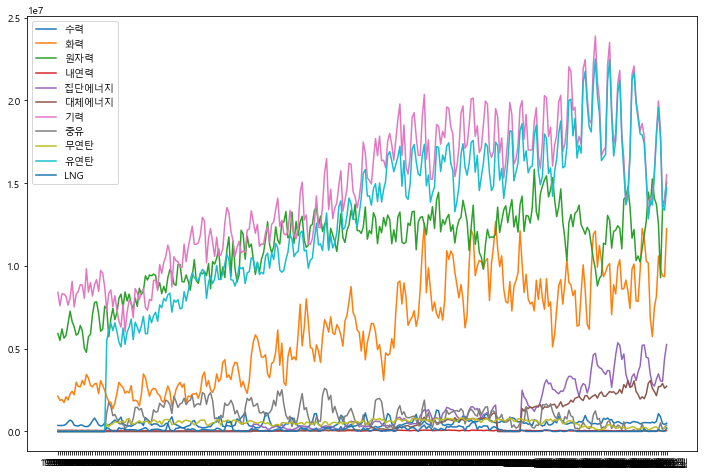

In [137]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12,8))
plt.plot(df_1996_2020)
plt.legend(df_1996_2020.columns)
plt.show()

### 시점 > datetime 변환 및 연도/월 컬럼 나누기
---

In [138]:
df_1996_2020 = df_1996_2020.reset_index()
df_1996_2020

,시점,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
0,1996.01,363291,2119473,5914976,72696,0,0,8408979,0,0,0,0
1,1996.02,356379,1875589,5497157,64679,0,0,7593086,0,0,0,0
2,1996.03,362980,1923728,6195468,64834,0,0,8306941,0,0,0,0
3,1996.04,367415,1747174,5637764,62517,0,0,8299351,0,0,0,0
4,1996.05,440662,2092955,5800186,60807,0,0,8156027,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020.8월,1074388,10603489,12526259,39266,3479530,2697249,19959998,121015,155300,19568516,115167
296,2020.9월,880238,9780155,9292564,40082,3049505,2718018,18228194,515236,17746,17653756,41455
297,2020.10월,473979,9393692,13468311,36319,3030188,2896983,13625540,109619,10420,13494382,11118
298,2020.11월,424738,9343792,14048115,43054,4412968,2612808,13868808,245122,258801,13364885,0


In [139]:
df_1996_2020['시점'] = df_1996_2020['시점'].str.replace('월',"")
df_1996_2020.tail()

,시점,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
295,2020.8,1074388,10603489,12526259,39266,3479530,2697249,19959998,121015,155300,19568516,115167
296,2020.9,880238,9780155,9292564,40082,3049505,2718018,18228194,515236,17746,17653756,41455
297,2020.10,473979,9393692,13468311,36319,3030188,2896983,13625540,109619,10420,13494382,11118
298,2020.11,424738,9343792,14048115,43054,4412968,2612808,13868808,245122,258801,13364885,0
299,2020.12,496020,12254957,15059831,51986,5254718,2727885,15511381,374707,230340,14724087,182248


In [140]:
datetime = pd.to_datetime(df_1996_2020['시점'])
year = pd.to_datetime(df_1996_2020['시점']).dt.year
month = pd.to_datetime(df_1996_2020['시점']).dt.month


df_1996_2020.insert(0,"datetime",datetime)
df_1996_2020.insert(1,"year",year)
df_1996_2020.insert(2,"month",month)
df_1996_2020 = df_1996_2020.drop("시점", axis=1)

In [141]:
df_1996_2020

,datetime,year,month,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
0,1996-01-01,1996,1,363291,2119473,5914976,72696,0,0,8408979,0,0,0,0
1,1996-02-01,1996,2,356379,1875589,5497157,64679,0,0,7593086,0,0,0,0
2,1996-03-01,1996,3,362980,1923728,6195468,64834,0,0,8306941,0,0,0,0
3,1996-04-01,1996,4,367415,1747174,5637764,62517,0,0,8299351,0,0,0,0
4,1996-05-01,1996,5,440662,2092955,5800186,60807,0,0,8156027,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-08-01,2020,8,1074388,10603489,12526259,39266,3479530,2697249,19959998,121015,155300,19568516,115167
296,2020-09-01,2020,9,880238,9780155,9292564,40082,3049505,2718018,18228194,515236,17746,17653756,41455
297,2020-10-01,2020,10,473979,9393692,13468311,36319,3030188,2896983,13625540,109619,10420,13494382,11118
298,2020-11-01,2020,11,424738,9343792,14048115,43054,4412968,2612808,13868808,245122,258801,13364885,0


### 2-3. 결측치 제거
---

In [142]:
df_1996_2020.shape

(300, 14)

In [143]:
# 타입 변환: type: object -> int
df_1996_2020['집단에너지'] = type_transform(['집단에너지'],df_1996_2020)
df_1996_2020['대체에너지'] = type_transform(['대체에너지'],df_1996_2020)
df_1996_2020['중유'] = type_transform(['중유'],df_1996_2020)
df_1996_2020['무연탄'] = type_transform(['무연탄'],df_1996_2020)
df_1996_2020['유연탄'] = type_transform(['유연탄'],df_1996_2020)
df_1996_2020['LNG'] = type_transform(['LNG'],df_1996_2020)

# 0 -> nan로 변환
df_1996_2020 = df_1996_2020.replace(0,np.nan)

In [144]:
# 결측치 확인
df_1996_2020.isnull().sum()

datetime      0
year          0
month         0
수력            0
화력            0
원자력           0
내연력           0
집단에너지       108
대체에너지       108
기력            0
중유           27
무연탄          24
유연탄          24
LNG          76
dtype: int64

In [145]:
# 보간법(linear) 결측치 대체
df_1996_2020['집단에너지'] = df_1996_2020['집단에너지'].interpolate()
df_1996_2020['대체에너지'] = df_1996_2020['대체에너지'].interpolate()
df_1996_2020['중유'] = df_1996_2020['중유'].interpolate()
df_1996_2020['무연탄'] = df_1996_2020['무연탄'].interpolate()
df_1996_2020['유연탄'] = df_1996_2020['유연탄'].interpolate()
df_1996_2020['LNG'] = df_1996_2020['LNG'].interpolate()

In [146]:
# 결측치 확인
df_1996_2020.isnull().sum()

datetime     0
year         0
month        0
수력           0
화력           0
원자력          0
내연력          0
집단에너지       96
대체에너지       96
기력           0
중유          24
무연탄         24
유연탄         24
LNG         24
dtype: int64

In [147]:
df_1996_2020

,datetime,year,month,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
0,1996-01-01,1996,1,363291,2119473,5914976,72696,NaN,NaN,8408979,NaN,NaN,NaN,NaN
1,1996-02-01,1996,2,356379,1875589,5497157,64679,NaN,NaN,7593086,NaN,NaN,NaN,NaN
2,1996-03-01,1996,3,362980,1923728,6195468,64834,NaN,NaN,8306941,NaN,NaN,NaN,NaN
3,1996-04-01,1996,4,367415,1747174,5637764,62517,NaN,NaN,8299351,NaN,NaN,NaN,NaN
4,1996-05-01,1996,5,440662,2092955,5800186,60807,NaN,NaN,8156027,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-08-01,2020,8,1074388,10603489,12526259,39266,3479530.0,2697249.0,19959998,121015.0,155300.0,19568516.0,115167.0
296,2020-09-01,2020,9,880238,9780155,9292564,40082,3049505.0,2718018.0,18228194,515236.0,17746.0,17653756.0,41455.0
297,2020-10-01,2020,10,473979,9393692,13468311,36319,3030188.0,2896983.0,13625540,109619.0,10420.0,13494382.0,11118.0
298,2020-11-01,2020,11,424738,9343792,14048115,43054,4412968.0,2612808.0,13868808,245122.0,258801.0,13364885.0,96683.0


In [148]:
# 0 -> nan로 변환
df_1996_2020 = df_1996_2020.fillna(method = 'bfill')

In [149]:
df_1996_2020.isnull().sum()

datetime    0
year        0
month       0
수력          0
화력          0
원자력         0
내연력         0
집단에너지       0
대체에너지       0
기력          0
중유          0
무연탄         0
유연탄         0
LNG         0
dtype: int64

### 전체시점, 월별, 연도별 시각화

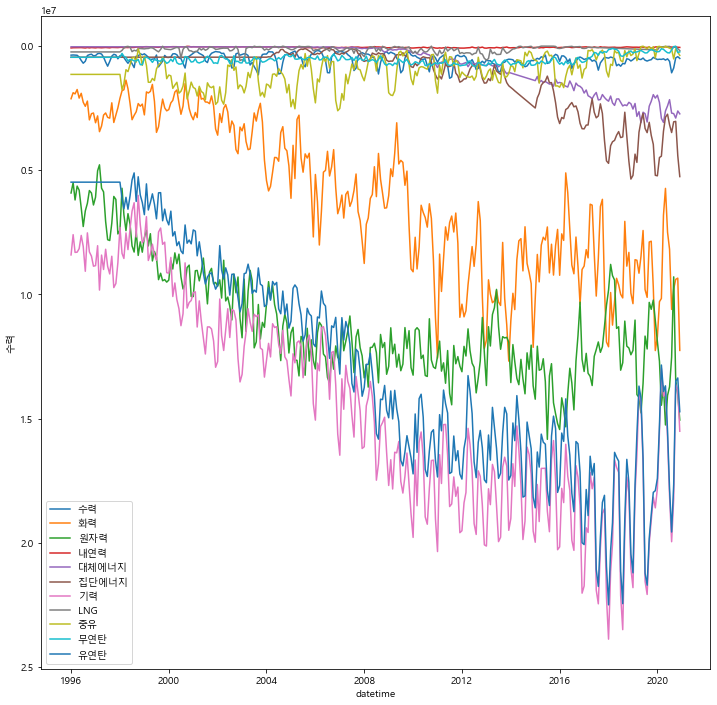

In [150]:
# 전체
plt.figure(figsize= [12,12])
sns.lineplot(data=df_1996_2020, x='datetime' ,y='수력', ci=None , estimator=sum,label='수력')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='화력', ci=None , estimator=sum,label='화력')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='원자력', ci=None , estimator=sum,label='원자력')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='내연력', ci=None , estimator=sum,label='내연력')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='대체에너지', ci=None , estimator=sum,label='대체에너지')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='집단에너지', ci=None , estimator=sum,label='집단에너지')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='기력', ci=None , estimator=sum,label='기력')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='LNG', ci=None , estimator=sum,label='LNG')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='중유', ci=None , estimator=sum,label='중유')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='무연탄', ci=None , estimator=sum,label='무연탄')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='유연탄', ci=None , estimator=sum,label='유연탄')
plt.legend()

In [151]:
df_1996_2020['집단에너지']

0       445503.0
1       445503.0
2       445503.0
3       445503.0
4       445503.0
         ...    
295    3479530.0
296    3049505.0
297    3030188.0
298    4412968.0
299    5254718.0
Name: 집단에너지, Length: 300, dtype: float64

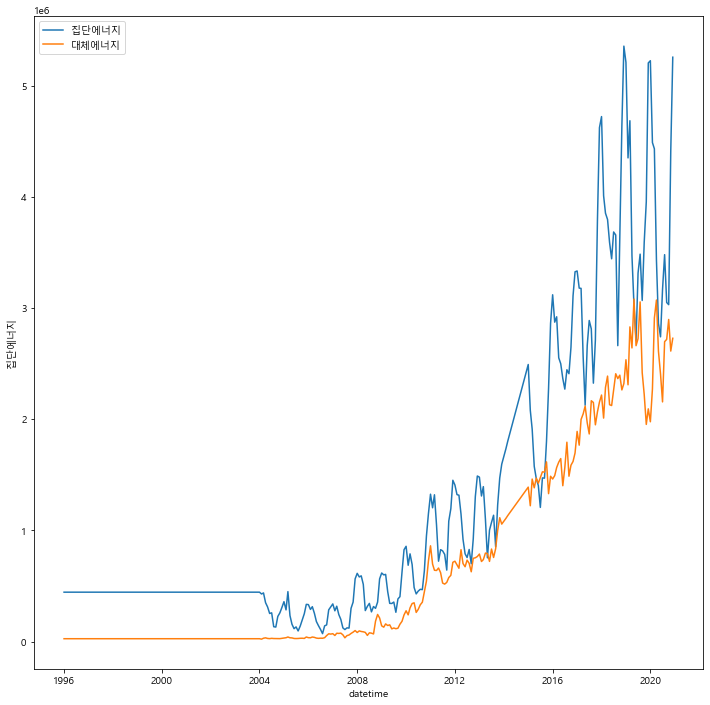

In [152]:
plt.figure(figsize= [12,12])
sns.lineplot(data=df_1996_2020, x='datetime' ,y='집단에너지', ci=None , estimator=sum,label='집단에너지')
sns.lineplot(data=df_1996_2020, x='datetime' ,y='대체에너지', ci=None , estimator=sum,label='대체에너지')
plt.legend()

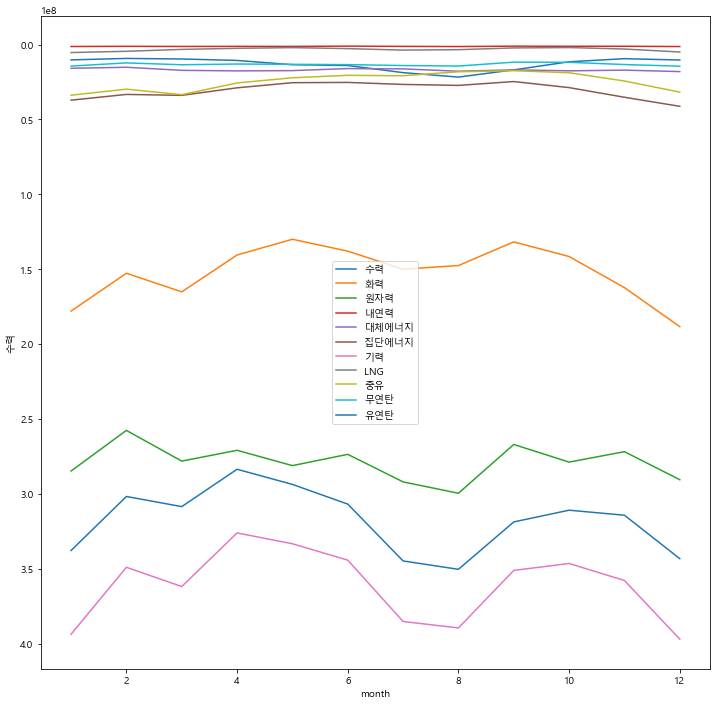

In [153]:
# 월별

plt.figure(figsize= [12,12])
sns.lineplot(data=df_1996_2020, x='month' ,y='수력', ci=None , estimator=sum,label='수력')
sns.lineplot(data=df_1996_2020, x='month' ,y='화력', ci=None , estimator=sum,label='화력')
sns.lineplot(data=df_1996_2020, x='month' ,y='원자력', ci=None , estimator=sum,label='원자력')
sns.lineplot(data=df_1996_2020, x='month' ,y='내연력', ci=None , estimator=sum,label='내연력')
sns.lineplot(data=df_1996_2020, x='month' ,y='대체에너지', ci=None , estimator=sum,label='대체에너지')
sns.lineplot(data=df_1996_2020, x='month' ,y='집단에너지', ci=None , estimator=sum,label='집단에너지')
sns.lineplot(data=df_1996_2020, x='month' ,y='기력', ci=None , estimator=sum,label='기력')
sns.lineplot(data=df_1996_2020, x='month' ,y='LNG', ci=None , estimator=sum,label='LNG')
sns.lineplot(data=df_1996_2020, x='month' ,y='중유', ci=None , estimator=sum,label='중유')
sns.lineplot(data=df_1996_2020, x='month' ,y='무연탄', ci=None , estimator=sum,label='무연탄')
sns.lineplot(data=df_1996_2020, x='month' ,y='유연탄', ci=None , estimator=sum,label='유연탄')
plt.legend()

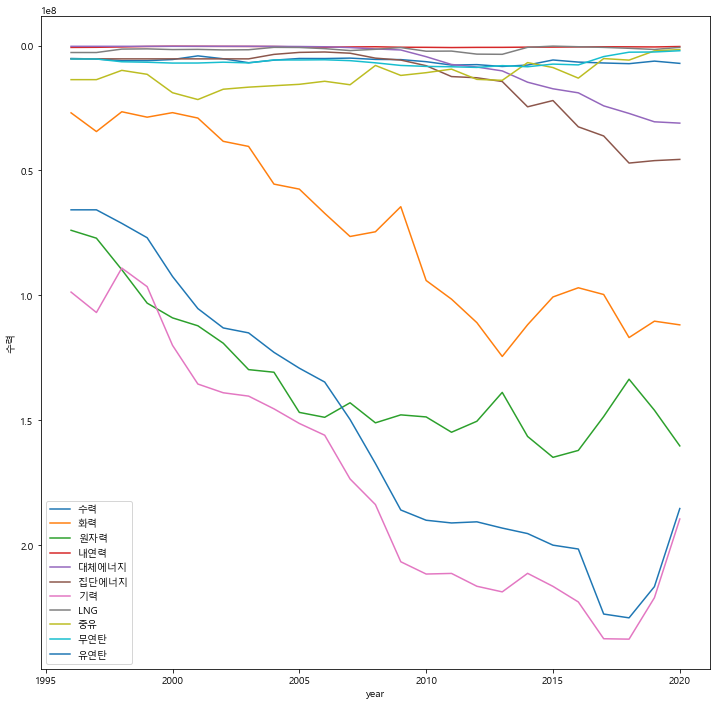

In [154]:
# 연도별

plt.figure(figsize= [12,12])
sns.lineplot(data=df_1996_2020, x='year' ,y='수력', ci=None , estimator=sum,label='수력')
sns.lineplot(data=df_1996_2020, x='year' ,y='화력', ci=None , estimator=sum,label='화력')
sns.lineplot(data=df_1996_2020, x='year' ,y='원자력', ci=None , estimator=sum,label='원자력')
sns.lineplot(data=df_1996_2020, x='year' ,y='내연력', ci=None , estimator=sum,label='내연력')
sns.lineplot(data=df_1996_2020, x='year' ,y='대체에너지', ci=None , estimator=sum,label='대체에너지')
sns.lineplot(data=df_1996_2020, x='year' ,y='집단에너지', ci=None , estimator=sum,label='집단에너지')
sns.lineplot(data=df_1996_2020, x='year' ,y='기력', ci=None , estimator=sum,label='기력')
sns.lineplot(data=df_1996_2020, x='year' ,y='LNG', ci=None , estimator=sum,label='LNG')
sns.lineplot(data=df_1996_2020, x='year' ,y='중유', ci=None , estimator=sum,label='중유')
sns.lineplot(data=df_1996_2020, x='year' ,y='무연탄', ci=None , estimator=sum,label='무연탄')
sns.lineplot(data=df_1996_2020, x='year' ,y='유연탄', ci=None , estimator=sum,label='유연탄')
plt.legend()


<AxesSubplot:xlabel='datetime', ylabel='내연력'>

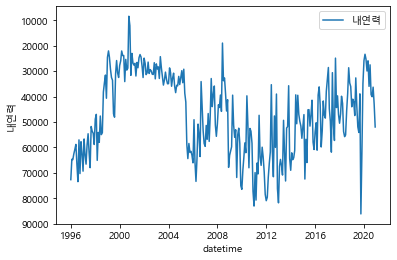

In [155]:
sns.lineplot(data=df_1996_2020, x='datetime' ,y='내연력', ci=None , estimator=sum,label='내연력')

<AxesSubplot:xlabel='month', ylabel='내연력'>

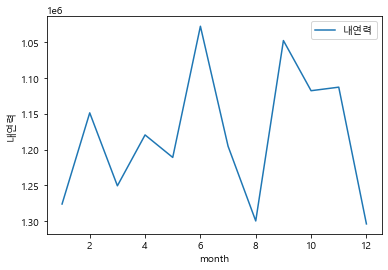

In [156]:
sns.lineplot(data=df_1996_2020, x='month' ,y='내연력', ci=None , estimator=sum,label='내연력')

# 스케일링된 데이터
--- 

In [157]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
df_1996_2020_scaled = scaler.fit_transform(df_1996_2020_scaled)


In [158]:
df_1996_2020_scaled = pd.DataFrame(df_1996_2020_scaled, columns=['수력','화력','원자력','내연력','집단에너지','대체에너지','기력','중유','무연탄','유연탄','LNG'])
df_1996_2020_scaled


,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
0,0.165935,0.066318,0.102653,0.826598,0.000000,0.000000,0.134089,0.000000,0.000000,0.000000,0.000000
1,0.159738,0.044770,0.064864,0.723486,0.000000,0.000000,0.088435,0.000000,0.000000,0.000000,0.000000
2,0.165656,0.049024,0.128022,0.725479,0.000000,0.000000,0.128379,0.000000,0.000000,0.000000,0.000000
3,0.169633,0.033424,0.077581,0.695678,0.000000,0.000000,0.127954,0.000000,0.000000,0.000000,0.000000
4,0.235305,0.063976,0.092271,0.673685,0.000000,0.000000,0.119935,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
295,0.803492,0.815921,0.700603,0.396630,0.649873,0.875599,0.780428,0.046491,0.191600,0.869596,0.189823
296,0.629421,0.743176,0.408135,0.407125,0.569557,0.882341,0.683525,0.197943,0.021894,0.784507,0.068328
297,0.265176,0.709030,0.785806,0.358727,0.565949,0.940438,0.425982,0.042113,0.012856,0.599670,0.018325
298,0.221027,0.704621,0.838246,0.445350,0.824212,0.848187,0.439594,0.094171,0.319293,0.593916,0.000000


In [159]:
df_1996_2020_scaled.insert(0,"datetime",datetime)
df_1996_2020_scaled.insert(1,"year",year)
df_1996_2020_scaled.insert(2,"month",month)

In [160]:
df_1996_2020_scaled

,datetime,year,month,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
0,1996-01-01,1996,1,0.165935,0.066318,0.102653,0.826598,0.000000,0.000000,0.134089,0.000000,0.000000,0.000000,0.000000
1,1996-02-01,1996,2,0.159738,0.044770,0.064864,0.723486,0.000000,0.000000,0.088435,0.000000,0.000000,0.000000,0.000000
2,1996-03-01,1996,3,0.165656,0.049024,0.128022,0.725479,0.000000,0.000000,0.128379,0.000000,0.000000,0.000000,0.000000
3,1996-04-01,1996,4,0.169633,0.033424,0.077581,0.695678,0.000000,0.000000,0.127954,0.000000,0.000000,0.000000,0.000000
4,1996-05-01,1996,5,0.235305,0.063976,0.092271,0.673685,0.000000,0.000000,0.119935,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-08-01,2020,8,0.803492,0.815921,0.700603,0.396630,0.649873,0.875599,0.780428,0.046491,0.191600,0.869596,0.189823
296,2020-09-01,2020,9,0.629421,0.743176,0.408135,0.407125,0.569557,0.882341,0.683525,0.197943,0.021894,0.784507,0.068328
297,2020-10-01,2020,10,0.265176,0.709030,0.785806,0.358727,0.565949,0.940438,0.425982,0.042113,0.012856,0.599670,0.018325
298,2020-11-01,2020,11,0.221027,0.704621,0.838246,0.445350,0.824212,0.848187,0.439594,0.094171,0.319293,0.593916,0.000000


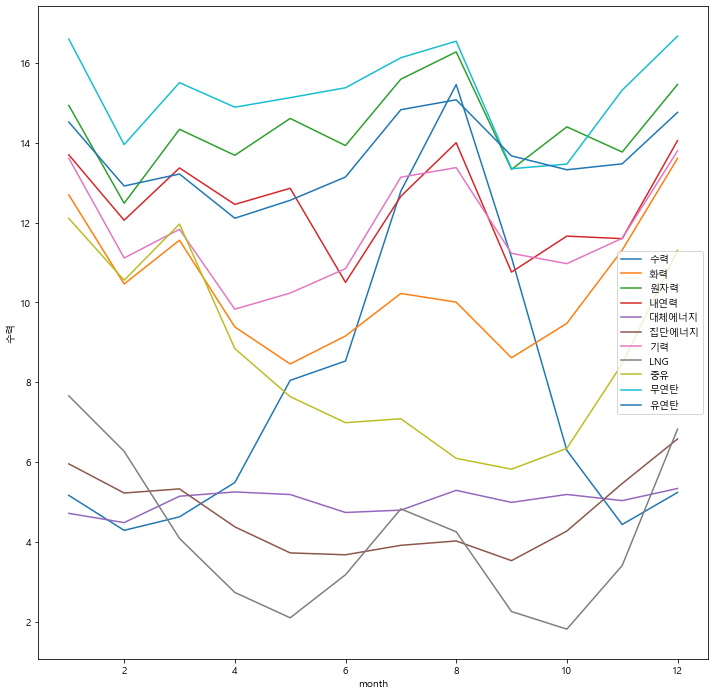

In [161]:
# 월별
plt.figure(figsize= [12,12])

sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='수력', ci=None , estimator=sum,label='수력')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='화력', ci=None , estimator=sum,label='화력')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='원자력', ci=None , estimator=sum,label='원자력')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='내연력', ci=None , estimator=sum,label='내연력')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='대체에너지', ci=None , estimator=sum,label='대체에너지')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='집단에너지', ci=None , estimator=sum,label='집단에너지')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='기력', ci=None , estimator=sum,label='기력')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='LNG', ci=None , estimator=sum,label='LNG')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='중유', ci=None , estimator=sum,label='중유')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='무연탄', ci=None , estimator=sum,label='무연탄')
sns.lineplot(data=df_1996_2020_scaled, x='month' ,y='유연탄', ci=None , estimator=sum,label='유연탄')
plt.legend()
plt.legend()

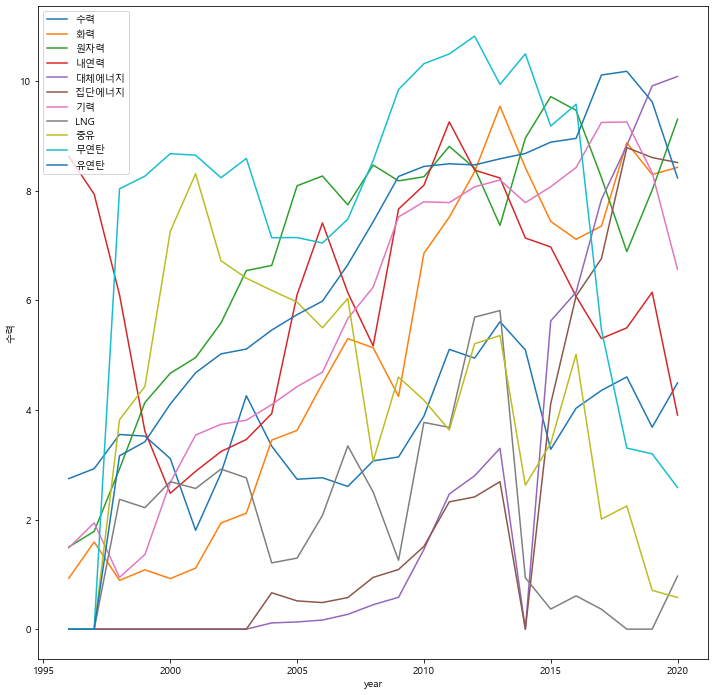

In [162]:
# 연도별
plt.figure(figsize= [12,12])

sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='수력', ci=None , estimator=sum,label='수력')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='화력', ci=None , estimator=sum,label='화력')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='원자력', ci=None , estimator=sum,label='원자력')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='내연력', ci=None , estimator=sum,label='내연력')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='대체에너지', ci=None , estimator=sum,label='대체에너지')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='집단에너지', ci=None , estimator=sum,label='집단에너지')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='기력', ci=None , estimator=sum,label='기력')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='LNG', ci=None , estimator=sum,label='LNG')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='중유', ci=None , estimator=sum,label='중유')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='무연탄', ci=None , estimator=sum,label='무연탄')
sns.lineplot(data=df_1996_2020_scaled, x='year' ,y='유연탄', ci=None , estimator=sum,label='유연탄')
plt.legend()

In [163]:
df_1996_2020_scaled.iloc[:,3:].corr()

,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
수력,1.000000,0.174997,0.235293,0.118712,0.110835,0.173719,0.248857,-0.326751,0.080071,0.274056,-0.021189
화력,0.174997,1.000000,0.634132,0.390580,0.686267,0.650495,0.863281,-0.146038,0.157666,0.821218,0.163678
원자력,0.235293,0.634132,1.000000,0.125430,0.412393,0.429565,0.716825,0.037930,0.448099,0.794504,0.094081
내연력,0.118712,0.390580,0.125430,1.000000,0.022585,0.012674,0.309946,-0.207430,0.037135,0.139006,0.139266
집단에너지,0.110835,0.686267,0.412393,0.022585,1.000000,0.948594,0.642752,-0.304302,-0.273335,0.641500,-0.209815
대체에너지,0.173719,0.650495,0.429565,0.012674,0.948594,1.000000,0.619777,-0.368519,-0.287592,0.628905,-0.241675
기력,0.248857,0.863281,0.716825,0.309946,0.642752,0.619777,1.000000,-0.039906,0.274563,0.942060,0.101826
중유,-0.326751,-0.146038,0.037930,-0.207430,-0.304302,-0.368519,-0.039906,1.000000,0.492440,-0.004271,0.454256
무연탄,0.080071,0.157666,0.448099,0.037135,-0.273335,-0.287592,0.274563,0.492440,1.000000,0.380222,0.468476
유연탄,0.274056,0.821218,0.794504,0.139006,0.641500,0.628905,0.942060,-0.004271,0.380222,1.000000,0.092294


# to_csv
---

In [164]:
df_1996_2020.head()

,datetime,year,month,수력,화력,원자력,내연력,집단에너지,대체에너지,기력,중유,무연탄,유연탄,LNG
0,1996-01-01,1996,1,363291,2119473,5914976,72696,445503.0,27078.0,8408979,1138275.0,449786.0,5478528.0,233891.0
1,1996-02-01,1996,2,356379,1875589,5497157,64679,445503.0,27078.0,7593086,1138275.0,449786.0,5478528.0,233891.0
2,1996-03-01,1996,3,362980,1923728,6195468,64834,445503.0,27078.0,8306941,1138275.0,449786.0,5478528.0,233891.0
3,1996-04-01,1996,4,367415,1747174,5637764,62517,445503.0,27078.0,8299351,1138275.0,449786.0,5478528.0,233891.0
4,1996-05-01,1996,5,440662,2092955,5800186,60807,445503.0,27078.0,8156027,1138275.0,449786.0,5478528.0,233891.0


In [165]:
df_1996_2020.columns = ['DATETIME','YEAR','MONTH','POWER_WATER','POWER_FIRE','POWER_NUCLEAR','POWER_NAEYEON','POWER_GROUP','POWER_TRANS','POWER_GAS','POWER_JUNG','POWER_MOO','POWER_YOU','POWER_LNG']

In [166]:
df_1996_2020.head()

,DATETIME,YEAR,MONTH,POWER_WATER,POWER_FIRE,POWER_NUCLEAR,POWER_NAEYEON,POWER_GROUP,POWER_TRANS,POWER_GAS,POWER_JUNG,POWER_MOO,POWER_YOU,POWER_LNG
0,1996-01-01,1996,1,363291,2119473,5914976,72696,445503.0,27078.0,8408979,1138275.0,449786.0,5478528.0,233891.0
1,1996-02-01,1996,2,356379,1875589,5497157,64679,445503.0,27078.0,7593086,1138275.0,449786.0,5478528.0,233891.0
2,1996-03-01,1996,3,362980,1923728,6195468,64834,445503.0,27078.0,8306941,1138275.0,449786.0,5478528.0,233891.0
3,1996-04-01,1996,4,367415,1747174,5637764,62517,445503.0,27078.0,8299351,1138275.0,449786.0,5478528.0,233891.0
4,1996-05-01,1996,5,440662,2092955,5800186,60807,445503.0,27078.0,8156027,1138275.0,449786.0,5478528.0,233891.0


In [167]:
df_1996_2020.to_csv('../Self_Study/minsoo_final.csv',index=False)